In [1]:
!pip install numpy matplotlib seaborn mesa 
!pip install jupyterlab_widgets ipywidgets

In [2]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import matplotlib.pyplot as plt
import seaborn as sns

import mesa

import time
from IPython.display import clear_output

In [3]:
# Import Cell Agent and OrthogonalMooreGrid
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid


# Instantiate MoneyAgent as CellAgent
class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell  # Instantiate agent with location (x,y)
        self.wealth = 1

    # Move Function
    def move(self):
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        cellmates = [
            a for a in self.cell.agents if a is not self
        ]  # Get all agents in cell

        if self.wealth > 0 and cellmates:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        # Instantiate an instance of Moore neighborhood space
        self.grid = OrthogonalMooreGrid(
            (width, height), torus=True, capacity=20, random=self.random
        )

        # Create agents
        agents = MoneyAgent.create_agents(
            self,
            self.num_agents,
            # Randomly select agents cell
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

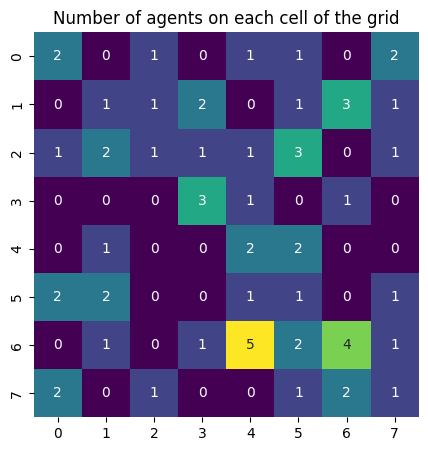

In [6]:
model = MoneyModel(64, 8, 8)
for _ in range(20):
    model.step()

agent_counts = np.zeros((model.grid.width, model.grid.height))

for cell in model.grid.all_cells:
    agent_counts[cell.coordinate] = len(cell.agents)
    print(cell.agents)

    # Plot using seaborn, with a visual size of 5x5
    g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
    g.figure.set_size_inches(5, 5)
    g.set(title="Number of agents on each cell of the grid");
    plt.show()

    time.sleep(0.25)
    clear_output(wait=True)